In [1]:
import pandas as pd
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import mplhep as hep
plt.style.use(hep.style.ROOT)
plt.style.use(hep.style.firamath)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 2

In [3]:
def plot_data(X, features, y=None, path=None):
    # plt.rcParams["text.usetex"] = False
    # # plt.rcParams['figure.figsize'] = 6, 2
    # # plt.rcParams['lines.markersize'] = 2
    # plt.rcParams['lines.linewidth'] = 2

    size = int(len(features)*1.5)   # old *0.6)
    dims = len(features)
    if y is not None:
        dims += 1

    fig, axs = plt.subplots(dims, 1, figsize=(17, size), sharex=True)

    for dim, feat in enumerate(features):  # iterate through the features we're using
        # print(feat)
        x_t = X[:, dim]
        axs[dim].plot(x_t)
        # if y is not None:
        #     y_scaled = np.max(x_t)*y
        #     axs[dim].plot(y_scaled, '--', linewidth=1, color='tab:orange', label='anomalies')
        # turn ylabel by 90 degrees and shift it to the left
        axs[dim].set_ylabel(feat, rotation=0, ha='right', rotation_mode='default', labelpad=5)
        # Align all y-axis labels by setting the same label coordinates
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        # axs[dim].legend(loc='upper right')
    if y is not None: # plot the target variable in last dimension if we have truth labels
        axs[-1].plot(y, '--', color='tab:red')
        axs[-1].set_yticks([0, 1])
        axs[-1].set_ylabel('anomalies', rotation=0, ha='right', rotation_mode='default', labelpad=5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)

    axs[-1].set_xlabel('Transactions')  # looks alignment-wise better than supxlabel
    # fig.supylabel('values')
    # fig.supxlabel('Time stamp [min]')
    plt.tight_layout()
    if path is not None:
        plt.savefig(f'{path}.png', dpi=100, facecolor='white')
    else:
        plt.show()
    plt.close()

## Eclipse data set

In [34]:
f_train = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_data.hdf', 'r')
f_test = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_data.hdf', 'r')

In [ ]:
print(f_train.keys())
print(f_train.attrs.keys())

print(f_train['prod_train_data'].keys())
print(f_train['prod_train_data']['axis0'])

In [ ]:
with f_train as file:
    for key in file['prod_train_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_train_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
with f_test as file:
    for key in file['prod_test_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_test_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
label_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_label.csv')
label_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_label.csv')

In [ ]:
print(label_test.shape, label_train.shape)
print(label_train)
y_train = label_train['binary_anom']
print(y_train[y_train==1])
y_test = label_test['binary_anom']
print(y_test[y_test==1], '\n', len(y_test[y_test==1]))

In [ ]:
label = label_test
label['job_id'] = label['job_id'].astype('str')
label['component_id'] = label['component_id'].astype('str') 
label.set_index(['job_id', 'component_id'], inplace=True)

print(label)

### IEE-CIS fraud detection data set (from kaggle challenge 2019)

In [ ]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_transaction.csv')
x_train2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_identity.csv')

In [ ]:
print(x_train.shape, x_train2.shape)
print(x_train.columns) #, x_train2.columns)

for i, name in enumerate(x_train.columns):
    print(name)
    # print(x_train[name].dtypes)

# Filter columns that are of type 'float'
float_cols = x_train.select_dtypes(include='float').columns
# print("Columns with float values:", float_cols)
# for i, name in enumerate(float_cols.columns):
#     print(name)

# Filter columns that are NOT of type 'float'
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)

In [ ]:
x_train = x_train.sort_values(by='TransactionDT')
x_train = x_train.drop(columns=non_num_cols)
y_train = x_train['isFraud']
x_train = x_train.drop(columns='isFraud')
print(x_train.shape, y_train.shape)

In [ ]:
x_train = x_train.fillna(0)
has_nan = y_train.isnull().any()
print(has_nan)
print(x_train.isnull().any())

In [ ]:
X = np.array(x_train)
y = np.array(y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from preprocess import normalize3
print(max(X_train[0]))
X_train, min_a, max_a = normalize3(X_train, min_a=None)
print(max(X_train[0]))
X_test, _, _ = normalize3(X_test, min_a, max_a)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for dim in range(5):
    x_t, l = X_train[:10000, dim], y_train[:10000]
    plt.figure(figsize=(10, 3))
    plt.plot(x_t, label='data')
    plt.plot(l, '--', linewidth=0.2)
    plt.fill_between(np.arange(l.shape[0]), l, color='tab:orange', alpha=0.3, label='Anomaly')
    plt.legend()
    plt.show()
    plt.close()



In [ ]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

In [15]:
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/train_1.npy', X_train)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/test_1.npy', X_test)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/labels_1.npy', y_test)

In [ ]:
# x_train['day'] = x_train['TransactionDT'] / (24 * 60 * 60)  # to convert seconds to hours

In [ ]:
# x_train['uid1'] =  (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str)
# x_train['uid2'] =  (x_train.card1.astype(str) +'_' + \
#             x_train.addr1.astype(str) +'_' + \
#             (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str))

In [ ]:
# print(x_train['uid1'])
# print(x_train['uid1'].unique)
# print(x_train['uid2'])
# print(x_train['uid2'].unique)

In [ ]:
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_transaction.csv')
x_test2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_identity.csv')


In [ ]:
print(x_test.columns)
print(x_test.shape)

for i, name in enumerate(x_test.columns):
    print(name)

In [ ]:
x_train = pd.sort_values(by='')

### IEEEE-CIS challenge from kaggle loaded from fraud-dataset-benchmark (contains UID)

In [4]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/train.csv')
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/test.csv')
labels = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieeecis/labels.csv')

In [5]:
print(x_train.shape, x_test.shape)
# print(x_train.columns, x_test.columns)
print(labels.shape)

(561013, 70) (29527, 70)
(29527, 2)


In [6]:
print(x_train.shape)
print(x_train.dtypes)

# Filter columns that are NOT of type 'float' and for now pop them out
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)
    # if name not in ['ENTITY_ID', 'EVENT_TIMESTAMP']:
    #     x_train.pop(name)
    #     x_test.pop(name)

print(x_train.shape)
print(x_test.shape)

(561013, 70)
TransactionID      float64
transactionamt     float64
productcd           object
card1              float64
card2              float64
                    ...   
id_20              float64
devicetype          object
deviceinfo          object
ENTITY_ID           object
EVENT_TIMESTAMP     object
Length: 70, dtype: object
Columns without numeric values: Index(['productcd', 'card6', 'p_emaildomain', 'r_emaildomain', 'devicetype',
       'deviceinfo', 'ENTITY_ID', 'EVENT_TIMESTAMP'],
      dtype='object') 8
productcd object
card6 object
p_emaildomain object
r_emaildomain object
devicetype object
deviceinfo object
ENTITY_ID object
EVENT_TIMESTAMP object
(561013, 70)
(29527, 70)


In [7]:
x_train = x_train.sort_values(['EVENT_TIMESTAMP'])
x_test = x_test.sort_values(['EVENT_TIMESTAMP'])
date_train = x_train.pop('EVENT_TIMESTAMP')
print(date_train.shape, date_train)
date_test = x_test.pop('EVENT_TIMESTAMP')
print(date_test.shape, date_test)

(561013,) 0         2021-01-02T00:00:00Z
1         2021-01-02T00:00:01Z
2         2021-01-02T00:01:09Z
3         2021-01-02T00:01:39Z
4         2021-01-02T00:01:46Z
                  ...         
561008    2021-06-21T23:10:39Z
561009    2021-06-21T23:10:41Z
561010    2021-06-21T23:10:58Z
561011    2021-06-21T23:11:04Z
561012    2021-06-21T23:11:12Z
Name: EVENT_TIMESTAMP, Length: 561013, dtype: object
(29527,) 0        2021-06-21T23:11:15Z
1        2021-06-21T23:11:29Z
2        2021-06-21T23:11:45Z
3        2021-06-21T23:12:00Z
4        2021-06-21T23:12:11Z
                 ...         
29522    2021-07-02T23:57:27Z
29523    2021-07-02T23:57:29Z
29524    2021-07-02T23:57:59Z
29525    2021-07-02T23:58:08Z
29526    2021-07-02T23:58:51Z
Name: EVENT_TIMESTAMP, Length: 29527, dtype: object


In [8]:
feature_names = list(x_train.columns)
feature_names.remove('ENTITY_ID') # because we don't want to use them as a feature
feature_names.remove('TransactionID') # because we don't want to use them as a feature
print(feature_names)

['transactionamt', 'productcd', 'card1', 'card2', 'card3', 'card5', 'card6', 'addr1', 'dist1', 'p_emaildomain', 'r_emaildomain', 'c1', 'c2', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'v62', 'v70', 'v76', 'v78', 'v82', 'v91', 'v127', 'v130', 'v139', 'v160', 'v165', 'v187', 'v203', 'v207', 'v209', 'v210', 'v221', 'v234', 'v257', 'v258', 'v261', 'v264', 'v266', 'v267', 'v271', 'v274', 'v277', 'v283', 'v285', 'v289', 'v291', 'v294', 'id_01', 'id_02', 'id_05', 'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20', 'devicetype', 'deviceinfo']


In [ ]:
# Group by ENTITY_ID for train data
grouped = x_train.groupby('ENTITY_ID')
print(grouped.size(), len(grouped))
# count how many entries in group are > 10
train_uid = grouped.size()[grouped.size() >= 50].index
train_uid = list(train_uid)
print(len(train_uid), train_uid)
max_len = max(grouped.size())
print(max_len, max(grouped.size()[grouped.size() == max_len].index))


In [ ]:
# # Convert each group to a 2D numpy array and stack them into a list of 2D data frames, first approach
# x_train3 = [group.drop(columns=['ENTITY_ID', 'TransactionID']).values for name, group in grouped if len(group) >= 50]

# print(len(x_train3), len(train_uid))

transactionamt
2786 unique values out of 16708
2158.06 0.583
productcd
5 unique values out of 16708
card1
101 unique values out of 16708
18246.0 1137.0
card2
64 unique values out of 16708
589.0 0.0
card3
3 unique values out of 16708
185.0 0.0
card5
14 unique values out of 16708
229.0 0.0


KeyboardInterrupt: 

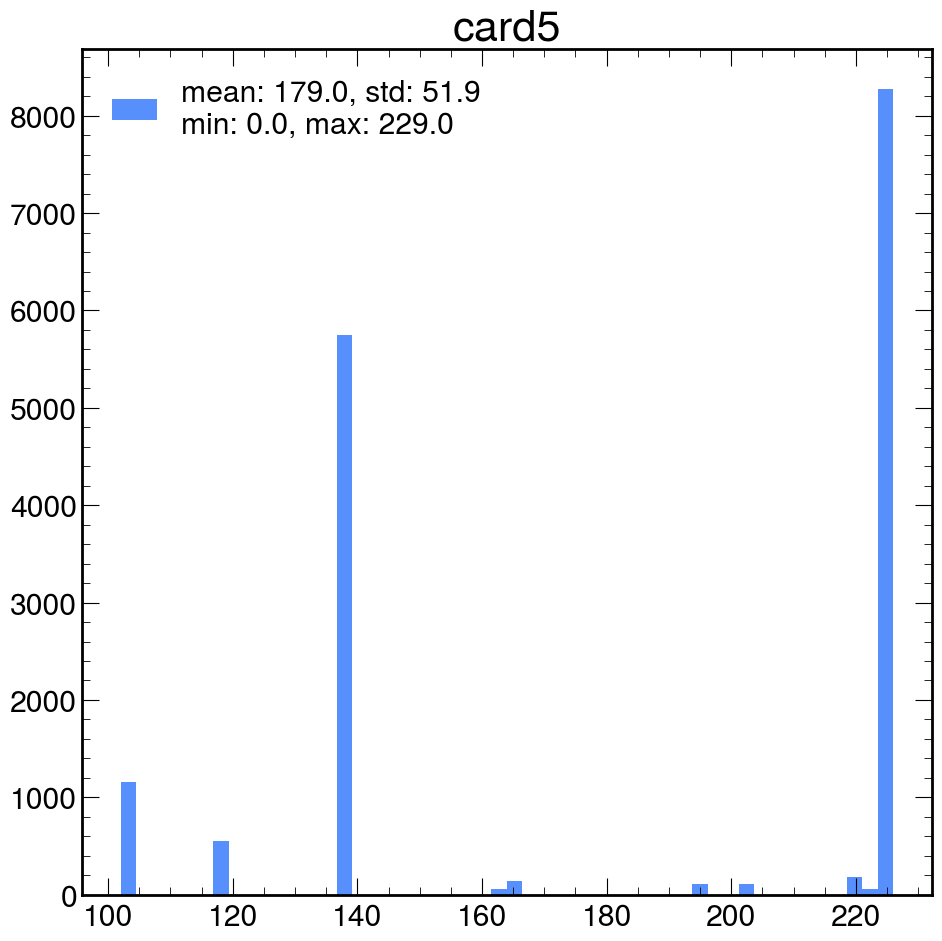

In [9]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach, here first plotting
short_list = ['p_emaildomain', 'r_emaildomain', 'deviceinfo']

grouped = x_train.groupby('ENTITY_ID')
for i, feat in enumerate(feature_names):    # enumerate(short_list): 
    tmp = np.empty((0))  # reset this temporary array for each feature
    print(feat)

    for name, group in grouped:
        if len(group) >= 50:
            # print(name, group)
            df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
                
            else:
                df[feat] = df[feat].fillna(0)
            tmp = np.concatenate((tmp, df[feat].values))
    
    print(f'{len(np.unique(tmp))} unique values out of {len(tmp)}')  # constructs set of df[feat] and counts the number of unique values

    if feat in non_num_cols:
        # for plotting
        unique_values, counts = np.unique(tmp, return_counts=True)
        if unique_values.shape[0] > 25:  # take 25 most frequent values for plots
            idx = np.argsort(counts)[::-1][:25]
            unique_values = unique_values[idx]
            counts = counts[idx]
            lab = f'showing 25 most frequent \nof {len(np.unique(tmp))} unique values'
        else:
            lab = f'{len(np.unique(tmp))} unique values'
        
        plt.bar(unique_values, counts, label=lab)
        if feat in ['p_emaildomain', 'r_emaildomain', 'deviceinfo']:
            plt.xticks(rotation=50, ha='right')
        plt.title(feat)
        plt.legend()
        plt.tight_layout()
        # plt.show()
        plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_new/feature_distr_zoom/{feat}.png', dpi=300, facecolor='white')
        plt.close()

    else:
        print(np.max(tmp), np.min(tmp))

        plt.hist(tmp, bins=50, range=[np.quantile(tmp,0.03), np.quantile(tmp,0.97)], label=f'mean: {np.mean(tmp):.1f}, std: {np.std(tmp):.1f} \nmin: {np.min(tmp):.1f}, max: {np.max(tmp):.1f}')
        plt.title(feat)
        plt.legend()
        plt.tight_layout()
        # plt.show()
        plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_new/feature_distr_zoom/{feat}.png', dpi=300, facecolor='white')
        plt.close()



In [10]:
# Convert each group to a 2D numpy array and stack them into a list of 2D arrays, second approach
from sklearn.preprocessing import OneHotEncoder

short_list = ['p_emaildomain', 'r_emaildomain', 'deviceinfo']
other_values = {}
encoding = {}
# means = {}  # next step
# std = {}

grouped = x_train.groupby('ENTITY_ID')
for i, feat in enumerate(feature_names):  
    tmp = np.empty((0))  # reset this temporary array for each feature

    # for name, group in grouped:  # first get all transactions in train data regardless of uid
    #     if len(group) >= 50:
    #         # print(name, group)
    #         df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
    #         if feat in non_num_cols:
    #             df[feat] = df[feat].fillna('missing')
    #         else:
    #             df[feat] = df[feat].fillna(0)
    #         tmp = np.concatenate((tmp, df[feat].values))
    
    # print(f'{len(np.unique(tmp))} unique values out of {len(tmp)}')  # constructs set of df[feat] and counts the number of unique values

    if feat in non_num_cols:
        print(feat)
        for name, group in grouped:  # first get all transactions in train data regardless of uid
            if len(group) >= 50:
                # print(name, group)
                df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
                if feat in non_num_cols:
                    df[feat] = df[feat].fillna('missing')
                else:
                    df[feat] = df[feat].fillna(0)
                tmp = np.concatenate((tmp, df[feat].values))

        # for encoding 
        unique_values, counts = np.unique(tmp, return_counts=True)
        if len(unique_values) > 50:  # take 100 most frequent values for encoding
            idx = np.argsort(counts)
            unique_values = unique_values[idx]  # unique values sorted in frequency
            other_values[feat] = unique_values[49:]   # values to be encoded as 'other'
            print(other_values)
            # replace all elements of tmp that are in other_values with 'other'
            idx = np.where(np.isin(tmp, other_values[feat]))
            tmp[idx] = 'other'
            # print(len(np.unique(tmp)))

        enc = OneHotEncoder(handle_unknown='ignore').fit(tmp.reshape(-1, 1))
        print(enc.categories_, len(enc.categories_[0]))
        encoding[feat] = enc

print(encoding)


productcd
[array(['C', 'H', 'R', 'S', 'W'], dtype=object)] 5
card6
[array(['credit', 'debit', 'missing'], dtype=object)] 3
p_emaildomain
[array(['aim.com', 'anonymous.com', 'aol.com', 'att.net', 'bellsouth.net',
       'charter.net', 'comcast.net', 'gmail', 'gmail.com',
       'hotmail.co.uk', 'hotmail.com', 'hotmail.es', 'hotmail.fr',
       'icloud.com', 'live.com', 'live.com.mx', 'mac.com', 'mail.com',
       'me.com', 'missing', 'msn.com', 'optonline.net', 'outlook.com',
       'outlook.es', 'prodigy.net.mx', 'rocketmail.com', 'sbcglobal.net',
       'sc.rr.com', 'verizon.net', 'yahoo.co.uk', 'yahoo.com',
       'yahoo.com.mx', 'yahoo.es'], dtype=object)] 33
r_emaildomain
[array(['anonymous.com', 'aol.com', 'cox.net', 'gmail', 'gmail.com',
       'hotmail.co.uk', 'hotmail.com', 'hotmail.es', 'hotmail.fr',
       'icloud.com', 'live.com', 'live.com.mx', 'mail.com', 'missing',
       'msn.com', 'outlook.com', 'outlook.es', 'prodigy.net.mx',
       'sbcglobal.net', 'yahoo.co.uk', 'yah

In [11]:
print(encoding.keys())

dict_keys(['productcd', 'card6', 'p_emaildomain', 'r_emaildomain', 'devicetype', 'deviceinfo'])


In [12]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach
x_train3 = []

grouped = x_train.groupby('ENTITY_ID')
train_uid = grouped.size()[grouped.size() >= 50].index
train_uid = list(train_uid)
for name, group in grouped:  # second get all transactions in train data keeping structure of uid
    if len(group) >= 50:
        # print(name, group)
        df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
        print(df.columns, df.shape)
        for i, feat in enumerate(feature_names):
            print(feat)
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
            else:
                df[feat] = df[feat].fillna(0)
            
            arr = df[feat].values
            print(arr.shape, len(np.unique(arr)))

            if feat in non_num_cols:
                if feat in other_values.keys():
                    idx = np.where(np.isin(arr, other_values[feat]))
                    arr[idx] = 'other'

                enc = encoding[feat]
                new_feat = enc.get_feature_names_out(input_features=[feat])
                print(new_feat)
                arr = enc.transform(arr.reshape(-1, 1)).toarray()                

                new_df = pd.DataFrame(arr, columns=new_feat)    # will start indexing from 0, creates pbm with concatenation
                print(new_df.shape)
                print(df.shape)
                df = df.reset_index(drop=True)          # Reset index to ensure proper concatenation
                new_df = new_df.reset_index(drop=True)  # Reset index to ensure proper concatenation
                df = pd.concat([df, new_df], axis=1)
                df.drop(columns=[feat], inplace=True)
                print(df.shape)

        # check if still any nan in df
        print(df.isnull().any().any())
        x_train3.append(df.values)

print(len(x_train3), len(train_uid))
updated_feature_names = df.columns


Index(['transactionamt', 'productcd', 'card1', 'card2', 'card3', 'card5',
       'card6', 'addr1', 'dist1', 'p_emaildomain', 'r_emaildomain', 'c1', 'c2',
       'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14',
       'v62', 'v70', 'v76', 'v78', 'v82', 'v91', 'v127', 'v130', 'v139',
       'v160', 'v165', 'v187', 'v203', 'v207', 'v209', 'v210', 'v221', 'v234',
       'v257', 'v258', 'v261', 'v264', 'v266', 'v267', 'v271', 'v274', 'v277',
       'v283', 'v285', 'v289', 'v291', 'v294', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20', 'devicetype',
       'deviceinfo'],
      dtype='object') (89, 67)
transactionamt
(89,) 34
productcd
(89,) 1
['productcd_C' 'productcd_H' 'productcd_R' 'productcd_S' 'productcd_W']
(89, 5)
(89, 67)
(89, 71)
card1
(89,) 1
card2
(89,) 2
card3
(89,) 2
card5
(89,) 2
card6
(89,) 2
['card6_credit' 'card6_debit' 'card6_missing']
(89, 3)
(89, 71)
(89, 73)
addr1
(89,) 1
dist1
(89,) 6
p_emaildomain
(89,) 3
['

In [14]:
print(len(x_train3), x_train3[0].shape, x_train3[0])
print(len(train_uid))
print(len(updated_feature_names), updated_feature_names)

213 (89, 178) [[1.0000e+02 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.1700e+02 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [7.7000e+01 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 ...
 [5.4000e+01 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [4.2000e+01 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]
 [5.4000e+01 1.1157e+04 2.1500e+02 ... 0.0000e+00 0.0000e+00 1.0000e+00]]
213
178 Index(['transactionamt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'dist1',
       'c1', 'c2', 'c4',
       ...
       'deviceinfo_SM-J110M Build/LMY48B', 'deviceinfo_SM-J250M Build/NMF26X',
       'deviceinfo_SM-J700T1 Build/NMF26X',
       'deviceinfo_SM-J710MN Build/NRD90M', 'deviceinfo_SM-J730G Build/NRD90M',
       'deviceinfo_SM-N9005 Build/LRX21V', 'deviceinfo_SM-N900W8 Build/LRX21V',
       'deviceinfo_SM-N910C Build/MMB29K', 'deviceinfo_SM-N910V Build/MMB29M',
       'deviceinfo_other'],
      dtype='object', length=

In [18]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach: for test data now
x_test3 = []

grouped_test = x_test.groupby('ENTITY_ID')
test_uid = grouped_test.size()[grouped_test.size() >= 20].index  # allow shorter time series for testing!
test_uid = list(test_uid)
for name, group in grouped_test:  # second get all transactions in test data keeping structure of uid
    if len(group) >= 20:
        df = group.drop(columns=['ENTITY_ID'])
        print(df.columns, df.shape)
        for i, feat in enumerate(feature_names):
            print(feat)
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
            else:
                df[feat] = df[feat].fillna(0)
            
            arr = df[feat].values
            print(arr.shape, len(np.unique(arr)))

            if feat in non_num_cols:
                if feat in other_values.keys():
                    idx = np.where(np.isin(arr, other_values[feat]))
                    arr[idx] = 'other'

                enc = encoding[feat]
                new_feat = enc.get_feature_names_out(input_features=[feat])
                print(new_feat)
                arr = enc.transform(arr.reshape(-1, 1)).toarray()                

                new_df = pd.DataFrame(arr, columns=new_feat)    # will start indexing from 0, creates pbm with concatenation
                print(new_df.shape)
                print(df.shape)
                df = df.reset_index(drop=True)          # Reset index to ensure proper concatenation
                new_df = new_df.reset_index(drop=True)  # Reset index to ensure proper concatenation
                df = pd.concat([df, new_df], axis=1)
                df.drop(columns=[feat], inplace=True)
                print(df.shape)

        # check if still any nan in df
        print(df.isnull().any().any())
        x_test3.append(df.values)

print(len(x_test3))
# updated_feature_names = df.columns


Index(['TransactionID', 'transactionamt', 'productcd', 'card1', 'card2',
       'card3', 'card5', 'card6', 'addr1', 'dist1', 'p_emaildomain',
       'r_emaildomain', 'c1', 'c2', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'v62', 'v70', 'v76', 'v78', 'v82', 'v91',
       'v127', 'v130', 'v139', 'v160', 'v165', 'v187', 'v203', 'v207', 'v209',
       'v210', 'v221', 'v234', 'v257', 'v258', 'v261', 'v264', 'v266', 'v267',
       'v271', 'v274', 'v277', 'v283', 'v285', 'v289', 'v291', 'v294', 'id_01',
       'id_02', 'id_05', 'id_06', 'id_09', 'id_13', 'id_17', 'id_19', 'id_20',
       'devicetype', 'deviceinfo'],
      dtype='object') (22, 68)
transactionamt
(22,) 17
productcd
(22,) 1
['productcd_C' 'productcd_H' 'productcd_R' 'productcd_S' 'productcd_W']
(22, 5)
(22, 68)
(22, 72)
card1
(22,) 1
card2
(22,) 1
card3
(22,) 1
card5
(22,) 1
card6
(22,) 1
['card6_credit' 'card6_debit' 'card6_missing']
(22, 3)
(22, 72)
(22, 74)
addr1
(22,) 1
dist1
(22,) 4
p_email

In [19]:
print(len(x_test3), x_test3[0].shape, x_test3[0])

21 (22, 179) [[3.565570e+06 2.900000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [3.565574e+06 2.300000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [3.565578e+06 2.100000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 ...
 [3.575425e+06 2.400000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [3.575431e+06 2.400000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [3.575436e+06 1.999000e+01 1.253800e+04 ... 0.000000e+00 0.000000e+00
  1.000000e+00]]


In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
for i, arr in enumerate(x_train3):
    print(f'time series for user: {train_uid[i]} has shape:\n {arr.shape}')

    # for j in range(0, len(updated_feature_names), 20):
    #     plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], path=f'plots_data/IEEECIS_new/train_{train_uid[i]}_{j}')
    
    # scaler = StandardScaler()
    # arr_scaled = scaler.fit_transform(arr)
    # plot_data(arr_scaled, feature_names, path=f'plots_data/IEEECIS_new/train_scaled_{train_uid[i]}')

    np.save(f'processed/IEEECIS_new/train_{train_uid[i]}.npy', arr)

time series for user: 11157.0_204.0_-58.0 has shape:
 (89, 178)
time series for user: 11207.0_126.0_-74.0 has shape:
 (81, 178)
time series for user: 1137.0_299.0_-480.0 has shape:
 (50, 178)
time series for user: 12163.0_204.0_-71.0 has shape:
 (64, 178)
time series for user: 12318.0_299.0_-7.0 has shape:
 (54, 178)
time series for user: 12501.0_204.0_-482.0 has shape:
 (75, 178)
time series for user: 12544.0_441.0_-54.0 has shape:
 (52, 178)
time series for user: 12544.0_476.0_-102.0 has shape:
 (59, 178)
time series for user: 12570.0_191.0_-22.0 has shape:
 (89, 178)
time series for user: 12616.0_nan_-491.0 has shape:
 (211, 178)
time series for user: 12695.0_126.0_33.0 has shape:
 (62, 178)
time series for user: 12695.0_325.0_-124.0 has shape:
 (84, 178)
time series for user: 12695.0_325.0_-28.0 has shape:
 (66, 178)
time series for user: 12695.0_325.0_-342.0 has shape:
 (109, 178)
time series for user: 12695.0_325.0_-480.0 has shape:
 (57, 178)
time series for user: 12725.0_204.0_

In [24]:
print(test_uid)

['12538.0_184.0_65.0', '13623.0_498.0_117.0', '14590.0_387.0_173.0', '14777.0_433.0_168.0', '15775.0_330.0_129.0', '15885.0_nan_172.0', '15885.0_nan_173.0', '15885.0_nan_174.0', '15885.0_nan_175.0', '15885.0_nan_176.0', '15885.0_nan_177.0', '15885.0_nan_178.0', '15885.0_nan_181.0', '16136.0_nan_144.0', '16136.0_nan_174.0', '16346.0_nan_173.0', '1684.0_485.0_165.0', '5812.0_nan_173.0', '8135.0_325.0_49.0', '9175.0_330.0_150.0', '9500.0_126.0_-85.0']


In [30]:
for i, arr in enumerate(x_test3):
    print(f'time series for user: {test_uid[i]} has shape:\n {arr.shape}')

    # for j in range(0, len(updated_feature_names), 20):
    #     plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], path=f'plots_data/IEEECIS_new/test_{test_uid[i]}_{j}')
    
    test_transaction_id = arr[:, 0]     # transaction IDs of the test data (needed to identify corresponding labels)
    arr = arr[:, 1:]                    # remove the transaction IDs from test data
    
    # pick the corresponding labels of the used test transactions
    indices = np.where(np.isin(labels['TransactionID'], test_transaction_id))
    y_test = np.array(labels.iloc[indices]['EVENT_LABEL'])
    y_test = y_test[:, np.newaxis]
    print('labels shape: ', y_test.shape, 'nb of anomalous transactions: ', len(y_test[y_test==1]))

    if test_uid[i] == '13623.0_498.0_117.0':
        for j in range(0, len(updated_feature_names), 20):
            plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], y=y_test, path=f'plots_data/IEEECIS_new/test_{test_uid[i]}_{j}')
    else:
        plot_data(arr[:,:20], updated_feature_names[:20], y=y_test, path=f'plots_data/IEEECIS_new/test_{test_uid[i]}_0')
    
    np.save(f'processed/IEEECIS_new/test_scaled_{test_uid[i]}.npy', arr)
    np.save(f'processed/IEEECIS_new/labels_{test_uid[i]}.npy', y_test)
    np.save(f'processed/IEEECIS_new/ids_{test_uid[i]}.npy', test_transaction_id)

time series for user: 12538.0_184.0_65.0 has shape:
 (22, 179)
labels shape:  (22, 1) nb of anomalous transactions:  0
time series for user: 13623.0_498.0_117.0 has shape:
 (21, 179)
labels shape:  (21, 1) nb of anomalous transactions:  21
time series for user: 14590.0_387.0_173.0 has shape:
 (20, 179)
labels shape:  (20, 1) nb of anomalous transactions:  0
time series for user: 14777.0_433.0_168.0 has shape:
 (25, 179)
labels shape:  (25, 1) nb of anomalous transactions:  0
time series for user: 15775.0_330.0_129.0 has shape:
 (389, 179)
labels shape:  (389, 1) nb of anomalous transactions:  0
time series for user: 15885.0_nan_172.0 has shape:
 (30, 179)
labels shape:  (30, 1) nb of anomalous transactions:  0
time series for user: 15885.0_nan_173.0 has shape:
 (45, 179)
labels shape:  (45, 1) nb of anomalous transactions:  1
time series for user: 15885.0_nan_174.0 has shape:
 (20, 179)
labels shape:  (20, 1) nb of anomalous transactions:  0
time series for user: 15885.0_nan_175.0 has 

In [ ]:
# Group by ENTITY_ID for test data
grouped = x_test.groupby('ENTITY_ID')
print(grouped.size(), len(grouped))
# count how many entries in group are > 10
test_uid = grouped.size()[grouped.size() >= 20].index
test_uid = list(test_uid)
print(test_uid)
max_len = max(grouped.size())
print(max_len, max(grouped.size()[grouped.size() == max_len].index))

# Convert each group to a 2D numpy array and stack them into a list of 2D data frames
x_test3 = [group.drop(columns='ENTITY_ID').values for name, group in grouped if len(group) >= 20]

print(len(x_test3), len(test_uid))

In [ ]:
print(len(x_test3), x_test3[0].shape, x_test3[0])

In [ ]:
# need to get the truth labels of the test data
for i, arr in enumerate(x_test3):
    print(f'time series for user: {test_uid[i]} has shape:\n {arr.shape}')

    test_transaction_id = arr[:, 0]     # transaction IDs of the test data (needed to identify corresponding labels)
    arr = np.nan_to_num(arr)            # test data
    
    # pick the corresponding labels of the used test transactions
    indices = np.where(np.isin(labels['TransactionID'], test_transaction_id))
    y_test = np.array(labels.iloc[indices]['EVENT_LABEL'])
    y_test = y_test[:, np.newaxis]
    print('labels shape: ', y_test.shape, 'nb of anomalous transactions: ', len(y_test[y_test==1]))

    # scaler already defined for train data? or better to redefine?
    arr_scaled = scaler.fit_transform(arr)

    print(arr_scaled.shape, y_test.shape)

    if len(y_test[y_test==1]) > 0:
        print(test_uid[i])
        plot_data(arr, feature_names, y=y_test, path=f'plots_data/IEEECIS_new/test_{test_uid[i]}')
        plot_data(arr_scaled, feature_names, y=y_test, path=f'plots_data/IEEECIS_new/test_scaled{test_uid[i]}')
    
        np.save(f'processed/IEEECIS_new/test_scaled_{test_uid[i]}.npy', arr_scaled)
        np.save(f'processed/IEEECIS_new/labels_{test_uid[i]}.npy', y_test)
        np.save(f'processed/IEEECIS_new/ids_{test_uid[i]}.npy', test_transaction_id)
    

### ATLAS time series data for AD in LAr data (from Vilius)

In [ ]:
f = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/user.vcepaiti.38697672.EXT0._000002.AnnotatorNtuple.h5', 'r')
print(f.keys(), f.attrs.keys())
data = np.array(f['data'])
lumiblock = np.array(f['lb'])

In [ ]:
print(data, data.shape, data[0].shape)

In [ ]:
print(f['event_labels'], f['event_numbers'], f['features'], f['run'])
evt_lb = np.array(f['event_labels'])
print(evt_lb, evt_lb[0].shape)
print(np.min(evt_lb[2]), np.max(evt_lb[2]))
print(np.unique(evt_lb[2]))
print(np.any(np.logical_and(evt_lb != 0, evt_lb !=2)))
evt_nb = np.array(f['event_numbers'])
print(evt_nb, evt_nb[0].shape)
features = np.array(f['features'])
print(features)
run = np.array(f['run'])
print(run)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(5):  # iterate through lumiblocks
    fig, axs = plt.subplots(16, 1, figsize=(10, 25), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        l = evt_lb[lb]
        l1 = (l==1) + 0
        l2 = (l==2) + 0
        l3 = (l==3) + 0
        # print(x_t.shape, x_t[0].shape)
        axs[dim].plot(x_t, label='data')
        axs[dim].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
        axs[dim].plot(l2, '--', linewidth=1, color='tab:red', label='noise burst')
        axs[dim].plot(l3, '--', linewidth=1, color='tab:purple', label='data corruption')
        axs[dim].set_title(str(features[dim])[2:-1])
    axs[0].legend()
    fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    plt.close()
    break



In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(5):  # iterate through lumiblocks
    fig, axs = plt.subplots(17, 1, figsize=(10, 28), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
        axs[dim].legend(loc='upper right')
        # axs[dim].set_title(features[dim][2:])
    
    l = evt_lb[lb]      # same label for all dimensions/features
    l1 = (l==1) + 0
    l2 = (l==2) + 0
    l3 = (l==3) + 0
    axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
    axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
    axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
    axs[-1].legend(loc='upper right')
    fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
    plt.close()



In [ ]:
for f in range(len(features)):
    features[f] = str(features[f])[2:-1]
print(features)

In [ ]:
labels = {}
for i in range(5):
    labels[f'lumiblock_{i}'] = (evt_lb[i] > 0) + 0
    l = labels[f'lumiblock_{i}']
    print(len(l[l>0]), len(l[l==0]), len(l[l>0])/len(l[l==0]))


In [ ]:
print(data[0].shape)
temp = np.stack(data[0])
print(np.array(data).shape, temp.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

for lb in range(5):
    
    x = np.stack(data[lb]).T
    print(x[:,0].shape)
    print(np.max(x[:,0]), np.min(x[:,0]), np.mean(x[:,0]), np.std(x[:,0]))
    y = labels[f'lumiblock_{lb}']
    print(x.shape, y.shape)
    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x)
    print(np.max(x_norm[:,0]), np.min(x_norm[:,0]), np.mean(x_norm[:,0]), np.std(x_norm[:,0]))  

    plt.plot(x_norm[:,0], label='normalised')
    plt.plot(x[:,0], label='raw')
    plt.legend()
    plt.show()
    plt.close()


In [ ]:
from preprocess import normalize3

x_train = np.stack(data[0]).T
for lb in range(1,4):
    x = np.stack(data[lb]).T
    print(x.shape)
    x_train = np.concatenate((x_train, x), axis=0)
    print(x_train.shape)
x_test = np.stack(data[4]).T
y_test = np.array(labels['lumiblock_4'][:, np.newaxis])
y_test = np.repeat(y_test, repeats=16, axis=1)
print(x_test.shape)
print(y_test.shape)


In [22]:
# standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# print(max(x[0]))
# x, min_a, max_a = normalize3(x_train, min_a=None)
# print(max(x_train[0]))
# x_test, _, _ = normalize3(x_test, min_a, max_a)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

fig, axs = plt.subplots(16, 1, figsize=(10, 28), sharex=True)

for dim in range(16):  # iterate through 16 features we're using
    x_t = x_train[:, dim]   
    axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
    axs[dim].legend(loc='upper right')
    # axs[dim].set_title(features[dim][2:])

# l = y_train      # same label for all dimensions/features
# l1 = (l==1) + 0
# l2 = (l==2) + 0
# l3 = (l==3) + 0
# axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
# axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
# axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
axs[-1].legend(loc='upper right')
fig.supylabel('label')
fig.supxlabel('events')
plt.tight_layout()
plt.show()
# plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
plt.close()


In [9]:
np.save(f'processed/ATLAS_TS/train.npy', x_train)
np.save(f'processed/ATLAS_TS/test.npy', x_test)
np.save(f'processed/ATLAS_TS/labels.npy', y_test)

In [ ]:
for lb in range(5):
    x = np.stack(data[lb]).T
    y = np.array(labels[f'lumiblock_{lb}'][:, np.newaxis])
    y = np.repeat(y, repeats=16, axis=1)
    print(x.shape)
    print(y.shape)

    np.save(f'processed/ATLAS_TS/lb_{lb}_train.npy', x)
    np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    
    # if lb < 4:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_train.npy', x)
    #     # np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    # else:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_test.npy', x)
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_labels.npy', y)

## data set on water quality

In [ ]:
data = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/3884398/1_gecco2018_water_quality.csv')
data = data.sort_values(by='Time')
print(data, data.columns)

In [ ]:
X = data.drop(['Time', 'Unnamed: 0', 'EVENT'], axis=1)
y = data.EVENT
features = X.columns
print(X.shape, y.shape)
print(features)

In [ ]:
X = np.array(X)
y = np.array(y+0)
print(len(y[y==1]), len(y[y==0]), len(y[y==1])/len(y))

In [ ]:
pbm = np.where(np.isnan(X))[0]
print(pbm)  
print(len(pbm))
X = np.nan_to_num(X, nan=0.0)
print(np.isnan(X).any())

In [19]:
import matplotlib.pyplot as plt

In [ ]:
len(X)*0.6

In [23]:
X_train = X[:83740]
X_test = X[83740:]
y_train = y[:83740]
y_test = y[83740:]

In [24]:
# need y to be 2D
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [25]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
plot_data(X_train, features, y_train, '/Users/lauraboggia/VSCode_projects/TranAD/data/3884398/data_train_norm')
plot_data(X_test, features, y_test, '/Users/lauraboggia/VSCode_projects/TranAD/data/3884398/data_test_norm')

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_test[y_test==1])/len(y_test))   
print(len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train))

In [30]:
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/GECCO/train.npy', X_train)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/GECCO/test.npy', X_test)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/GECCO/labels.npy', y_test)